Стационарное уравнение Шредингера: 
$$ -\frac{\hbar^2}{2m}\frac{d^2}{d x^2} \psi(x) + V(x)\psi(x) = E\psi(x)$$

Пусть есть вектор $f(x) = [f_0,f_1,f_2,...,f_{N-1}]$ тогда его производная будет: $f'(x) = [f'_0,f'_1,f'_2...,f'_{N-1}]$. Через метод конечных разностей это может быть записано как:
$$ f'_i = (f_{i+1} - f_i)/h $$
Или в матричном виде:
$$
\begin{pmatrix}f'_0 \\ f'_1 \\\vdots \\ f'_{N-1}\end{pmatrix} = \frac{1}{h}
\begin{pmatrix} -1 & 1 & 0 & & \\ 0 & -1 & 1 & & \\ & & \ddots & \ddots \\
& & & -1 & \end{pmatrix}\begin{pmatrix}f_0 \\ f_1 \\\vdots \\ f_{N-1}\end{pmatrix}
$$

Аналогично для второй производной:
$$
\frac{d^2}{dx^2}f(x) = \lim_{\Delta x \rightarrow 0} \frac{f(x+\Delta x) - 2f(x) + f(x-\Delta x))}{\Delta x^2} \approx \frac{f(x+h) - 2f(x) + f(x-h))}{h^2}
$$
То есть:
$$ f''_i = (f_{i+1} - 2f_i + f_{i-1})/h^2 $$
Или в матричном виде:
$$
\begin{pmatrix}f''_0 \\ f''_1 \\ f''_2 \\\vdots \\ f''_{N-1}\end{pmatrix} = \frac{1}{h^2}
\begin{pmatrix} -2 & 1 & 0 & 0 & \\ 1 & -2 & 1 & 0 & \\ 
0& 1 & -2 & 1 &  \\ &  & \ddots & \ddots & \ddots &\\
&  & & 1 & -2 \end{pmatrix}\begin{pmatrix}f_0 \\ f_1 \\ f_2 \\\vdots \\ f_{N-1}\end{pmatrix}
$$
Видно, что проблема возникает на концах вектора, но для определенности будем брать $f''_0 = f''_1$ и $f''_{N-1} = f''_{N-2}$

## УШ

Представим уравнение шредингера в матричном виде:
$$
\hat H = \frac{\hbar^2}{2m}\frac{d^2}{d x^2} + V \\
\hat H \psi(x) = E \psi(x)
$$

Представляя Гамильтониан как сумму невозмущеннного $\mathbf{H}$ и возмущения $\mathbf{V}$ мы получаем:
$$
\mathbf{H} = \frac{-\hbar^2}{2 m h^2} \begin{pmatrix} -2 & 1 & 0 & 0 & \\ 1 & -2 & 1 & 0 & \\ 
0& 1 & -2 & 1 &  \\ &  & \ddots & \ddots & \ddots &\\
&  & & 1 & -2 \end{pmatrix} + 
\begin{pmatrix} V_0 & 0 & 0 & & \\ 0 & V_1 & 0 & & \\ 0 & 0 & V_2 & & \\ & & &\ddots & \\ &&&&V_{N-1}\end{pmatrix}
$$ 



In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as scl
hbar = 1
m = 1
N = 4097
a = 4.
x = np.linspace(-a/2.,a/2.,N)

h = x[1]-x[0] 

V0 = -40
A0 = 10
V=np.zeros(N)
for i in range(N):
    if x[i]> (-a/2+h) and x[i]< (a/2-h):
        V[i]= V0 + A0*x[i]*x[i]     

Mdd = 1./(h*h)*(np.diag(np.ones(N-1),-1) -2* np.diag(np.ones(N),0) + np.diag(np.ones(N-1),1))
H = -(hbar*hbar)/(2.0*m)*Mdd + np.diag(V) 
E,psiT = np.linalg.eigh(H) 
psi = np.transpose(psiT)   

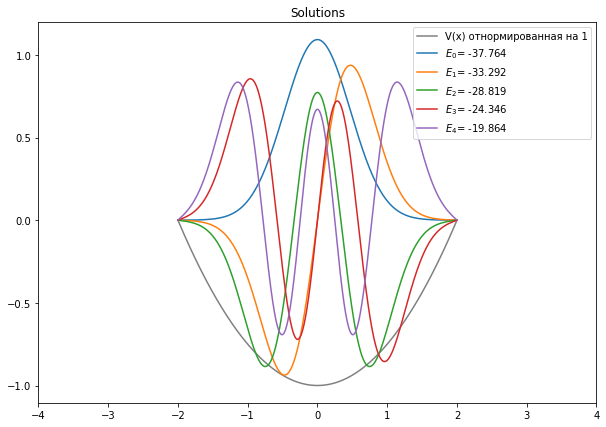

In [21]:
plt.figure(figsize=(10,7))
plt.xlim((-a,a))
plt.plot(x,V/(-V0),color="Gray",label="V(x) отнормированная на 1")
for i in range(5):                 
    plt.plot(x,psi[i]/np.sqrt(h),label="$E_{}$={:>8.3f}".format(i,E[i]))
plt.title("Solutions")
plt.legend()
plt.show()